In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [128]:
ETF = yf.download(tickers=['VOO', 'QQQ'], interval='1mo', auto_adjust=True)['Close']
ETF.dropna(inplace=True)
ETF.columns

[*********************100%***********************]  2 of 2 completed


Index(['QQQ', 'VOO'], dtype='object', name='Ticker')

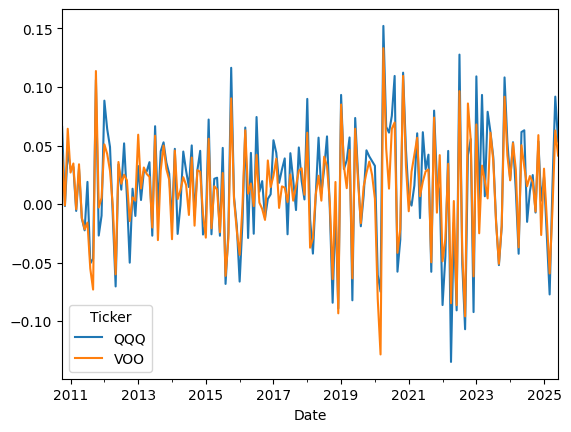

In [129]:
returns = ETF.pct_change().iloc[1::]
returns.plot()
pass

In [130]:
LogReturn = np.log(ETF / ETF.shift(1)).iloc[1::]
LogReturn

Ticker,QQQ,VOO
Date,,
2010-10-01,0.063790,0.042475
2010-11-01,-0.001726,-0.001109
2010-12-01,0.044494,0.062353
2011-01-01,0.029866,0.026557
2011-02-01,0.031118,0.034077
...,...,...
2025-02-01,-0.027407,-0.012731
2025-03-01,-0.080384,-0.061175
2025-04-01,0.015362,-0.004686


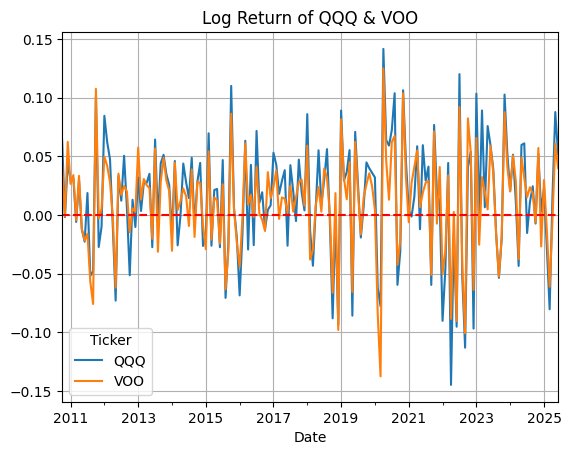

In [121]:
LogReturn.plot()
plt.title("Log Return of QQQ & VOO")
plt.axhline(color='r', linestyle='--')
plt.grid(True)
plt.show()

In [90]:
def annualize_returns(r, periods_per_year=12):
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year / n_periods) - 1

In [93]:
def annualize_vol(r, periods_per_year=12):
    return r.std() * (periods_per_year**0.5)

In [96]:
# Raw Sharpe Ratio
annualize_returns(returns) / annualize_vol(returns)

Ticker
QQQ    1.096190
VOO    0.977685
dtype: float64